<a href="https://colab.research.google.com/github/lucaschini/analise-cesta-basica/blob/main/Explorando_dados_cesta_b%C3%A1sica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("data.xlsx")

In [ ]:
df

,Mes_Ano_Data,PRODUTO,Preço_Medio_Item
0,2022-09-01,Arroz,4.728468
1,2022-09-01,Açúcar,4.641071
2,2022-09-01,Banana,7.476429
3,2022-09-01,Batata,5.256429
4,2022-09-01,Café,38.323371
...,...,...,...
385,2025-02-01,Leite,5.552099
386,2025-02-01,Manteiga,72.563735
387,2025-02-01,Óleo,9.344925
388,2025-02-01,Pão Francês,16.806818


In [ ]:
df_quantidades = pd.read_excel("quantidades.xlsx")

In [ ]:
df_quantidades

,Item,Qtde
0,Açúcar,3.00
1,Arroz,3.00
2,Banana,7.65
3,Batata,6.00
4,Café,0.60
5,Carne,6.00
6,Farinha,1.50
7,Feijão,4.50
8,Leite,7.50
9,Manteiga,0.75


In [ ]:
df_quantidades = df_quantidades.rename(columns={'Item': 'PRODUTO'})

In [ ]:
df_custo = (
    df.merge(df_quantidades, on='PRODUTO', how='left')
    .assign(Custo_Item=lambda d: d['Preço_Medio_Item'] * d['Qtde'])  # custo por produto
)

In [ ]:
cesta_total_mensal = (
    df_custo.groupby('Mes_Ano_Data')['Custo_Item']
    .sum()
    .reset_index(name='custo_cesta')
)

In [ ]:
df_final = pd.merge(df_custo, cesta_total_mensal, on='Mes_Ano_Data', how='left')
df_final

,Mes_Ano_Data,PRODUTO,Preço_Medio_Item,Qtde,Custo_Item,custo_cesta
0,2022-09-01,Arroz,4.728468,3.00,14.185404,689.434115
1,2022-09-01,Açúcar,4.641071,3.00,13.923214,689.434115
2,2022-09-01,Banana,7.476429,7.65,57.194679,689.434115
3,2022-09-01,Batata,5.256429,6.00,31.538571,689.434115
4,2022-09-01,Café,38.323371,0.60,22.994022,689.434115
...,...,...,...,...,...,...
385,2025-02-01,Leite,5.552099,7.50,41.640741,772.951339
386,2025-02-01,Manteiga,72.563735,0.75,54.422801,772.951339
387,2025-02-01,Óleo,9.344925,0.75,7.008693,772.951339
388,2025-02-01,Pão Francês,16.806818,6.00,100.840909,772.951339


In [ ]:
dados = [
    # 2025
    ("Janeiro", 2025, 1518.00),
    ("Fevereiro", 2025, 1518.00),
    ("Março", 2025, 1518.00),
    ("Abril", 2025, 1518.00),

    # 2024
    ("Janeiro", 2024, 1412.00),
    ("Fevereiro", 2024, 1412.00),
    ("Março", 2024, 1412.00),
    ("Abril", 2024, 1412.00),
    ("Maio", 2024, 1412.00),
    ("Junho", 2024, 1412.00),
    ("Julho", 2024, 1412.00),
    ("Agosto", 2024, 1412.00),
    ("Setembro", 2024, 1412.00),
    ("Outubro", 2024, 1412.00),
    ("Novembro", 2024, 1412.00),
    ("Dezembro", 2024, 1412.00),

    # 2023
    ("Janeiro", 2023, 1302.00),
    ("Fevereiro", 2023, 1302.00),
    ("Março", 2023, 1302.00),
    ("Abril", 2023, 1302.00),
    ("Maio", 2023, 1320.00),
    ("Junho", 2023, 1320.00),
    ("Julho", 2023, 1320.00),
    ("Agosto", 2023, 1320.00),
    ("Setembro", 2023, 1320.00),
    ("Outubro", 2023, 1320.00),
    ("Novembro", 2023, 1320.00),
    ("Dezembro", 2023, 1320.00),

    # 2022
    ("Janeiro", 2022, 1212.00),
    ("Fevereiro", 2022, 1212.00),
    ("Março", 2022, 1212.00),
    ("Abril", 2022, 1212.00),
    ("Maio", 2022, 1212.00),
    ("Junho", 2022, 1212.00),
    ("Julho", 2022, 1212.00),
    ("Agosto", 2022, 1212.00),
    ("Setembro", 2022, 1212.00),
    ("Outubro", 2022, 1212.00),
    ("Novembro", 2022, 1212.00),
    ("Dezembro", 2022, 1212.00),
]

# Mapeando nomes dos meses para números
mapa_meses = {
    "Janeiro": "01", "Fevereiro": "02", "Março": "03", "Abril": "04",
    "Maio": "05", "Junho": "06", "Julho": "07", "Agosto": "08",
    "Setembro": "09", "Outubro": "10", "Novembro": "11", "Dezembro": "12"
}

# Criando o DataFrame
df = pd.DataFrame(dados, columns=["Mês", "Ano", "Salario_Minimo"])
df["Mes_Ano_Data"] = pd.to_datetime(
    df["Ano"].astype(str) + "-" + df["Mês"].map(mapa_meses) + "-01"
)

# Reorganizando colunas
df = df[["Mes_Ano_Data", "Salario_Minimo"]]

df

,Mes_Ano_Data,Salario_Minimo
0,2025-01-01,1518.0
1,2025-02-01,1518.0
2,2025-03-01,1518.0
3,2025-04-01,1518.0
4,2024-01-01,1412.0
5,2024-02-01,1412.0
6,2024-03-01,1412.0
7,2024-04-01,1412.0
8,2024-05-01,1412.0
9,2024-06-01,1412.0


In [ ]:
df_final = pd.merge(df_final, df, on='Mes_Ano_Data', how='left')
df_final

,Mes_Ano_Data,PRODUTO,Preço_Medio_Item,Qtde,Custo_Item,custo_cesta,Salario_Minimo
0,2022-09-01,Arroz,4.728468,3.00,14.185404,689.434115,1212.0
1,2022-09-01,Açúcar,4.641071,3.00,13.923214,689.434115,1212.0
2,2022-09-01,Banana,7.476429,7.65,57.194679,689.434115,1212.0
3,2022-09-01,Batata,5.256429,6.00,31.538571,689.434115,1212.0
4,2022-09-01,Café,38.323371,0.60,22.994022,689.434115,1212.0
...,...,...,...,...,...,...,...
385,2025-02-01,Leite,5.552099,7.50,41.640741,772.951339,1518.0
386,2025-02-01,Manteiga,72.563735,0.75,54.422801,772.951339,1518.0
387,2025-02-01,Óleo,9.344925,0.75,7.008693,772.951339,1518.0
388,2025-02-01,Pão Francês,16.806818,6.00,100.840909,772.951339,1518.0


Fonte: https://www.dieese.org.br/analisecestabasica/salarioMinimo.html

Explorando possível correlação a fim de prever preços.

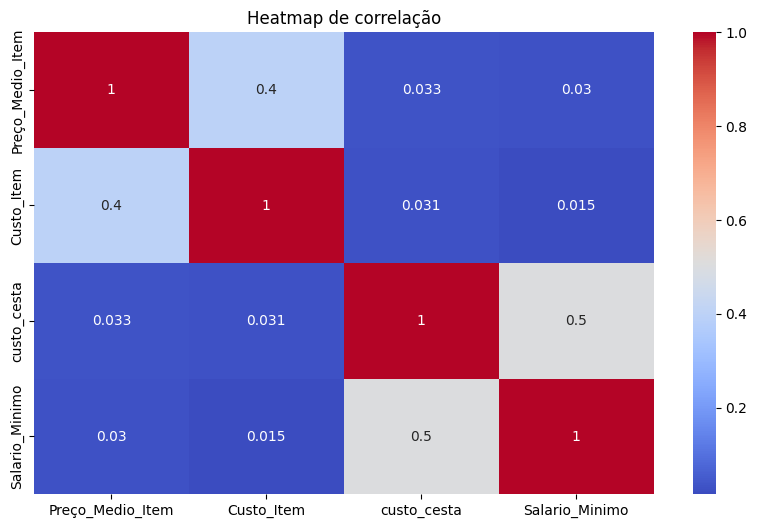

In [ ]:
cols_for_corr = [
    'Preço_Medio_Item',
    'Custo_Item',
    'custo_cesta',
    'Salario_Minimo'
]

corr_matrix = df_final[cols_for_corr].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap de correlação")
plt.show()

In [ ]:
 df_final.to_csv("df_final.csv", index=False)